In [ ]:
######################################################################################
'''Copyright (c) 2023, 2024 , Prof. Radhamadhab Dalai, ITER , Siksha O Aanusandhan University, 
Odisha, India
Author's email address :  radhamadhabdalai@soa.ac.in'''
###################################################################################


Approximate first derivative at x0 = 1 is: 2.7296272747788093


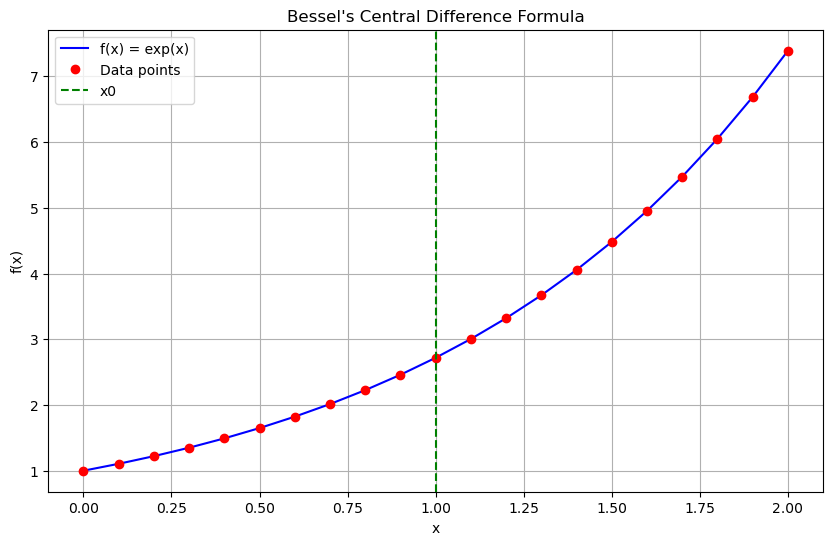

In [1]:
#Bessel's Central Difference Formula
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.exp(x)

# Parameters
x0 = 1  # Point at which we want the derivative
h = 0.1  # Step size
N = 10   # Number of points on either side of x0

# Generate data points around x0
x = np.arange(x0 - N*h, x0 + (N+1)*h, h)
y = f(x)

# Compute central differences
def central_difference(y, h):
    N = len(y)
    deltas = np.zeros(N)
    for i in range(1, N-1):
        deltas[i] = (y[i+1] - y[i-1]) / (2*h)
    return deltas

# Apply Bessel's central difference formula
deltas = central_difference(y, h)

# Bessel's central difference approximation for the first derivative at x0
# Using only the first two terms for simplicity
f_prime_approx = (deltas[N] + (deltas[N-1] + deltas[N+1])/2) / 2

print("Approximate first derivative at x0 =", x0, "is:", f_prime_approx)

# Plot the function and the points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = exp(x)')
plt.plot(x, y, 'ro', label='Data points')
plt.axvline(x=x0, color='g', linestyle='--', label='x0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bessel\'s Central Difference Formula')
plt.legend()
plt.grid(True)
plt.show()

Approximate first derivative at x0 = 1 is: 2.7190489143264376


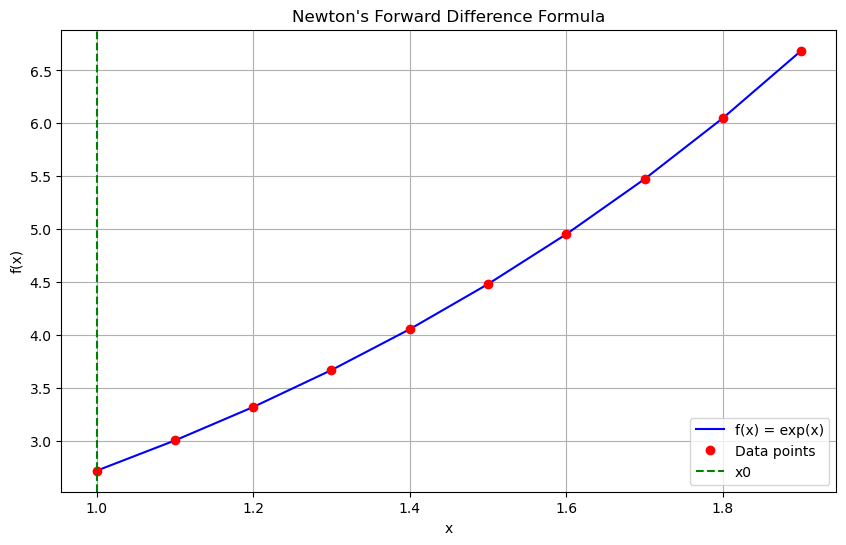

In [2]:
### Newton's Forward Difference Formula

import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.exp(x)

# Parameters
x0 = 1  # Point at which we want the derivative
h = 0.1  # Step size
N = 10   # Number of points to generate

# Generate data points starting from x0
x = np.arange(x0, x0 + N*h, h)
y = f(x)

# Compute forward differences
def forward_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]
    return delta_y

# Apply Newton's forward difference formula
delta_y = forward_differences(y)

# Newton's forward difference approximation for the first derivative at x0
f_prime_approx = delta_y[0, 1] / h - delta_y[0, 2] / (2 * h) + delta_y[0, 3] / (3 * h)

print("Approximate first derivative at x0 =", x0, "is:", f_prime_approx)

# Plot the function and the points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = exp(x)')
plt.plot(x, y, 'ro', label='Data points')
plt.axvline(x=x0, color='g', linestyle='--', label='x0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Forward Difference Formula')
plt.legend()
plt.grid(True)
plt.show()

Approximate first derivative at x0 = 1 is: 2.7176784228594273


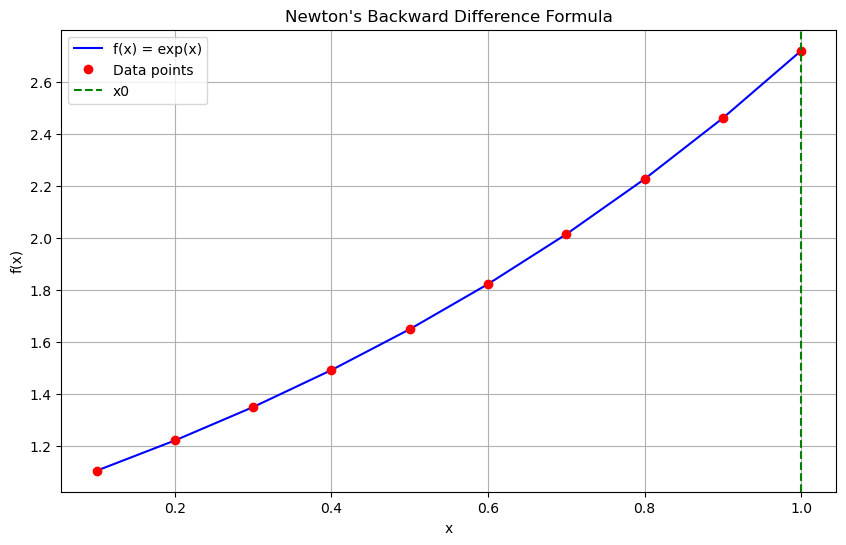

In [3]:
### Newton's Backward Difference Formula
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.exp(x)

# Parameters
x0 = 1  # Point at which we want the derivative
h = 0.1  # Step size
N = 10   # Number of points to generate

# Generate data points ending at x0
x = np.arange(x0 - (N-1)*h, x0 + h, h)
y = f(x)

# Compute backward differences
def backward_differences(y):
    n = len(y)
    nabla_y = np.zeros((n, n))
    nabla_y[:, 0] = y
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            nabla_y[i, j] = nabla_y[i, j - 1] - nabla_y[i - 1, j - 1]
    return nabla_y

# Apply Newton's backward difference formula
nabla_y = backward_differences(y)

# Newton's backward difference approximation for the first derivative at x0
f_prime_approx = (nabla_y[-1, 1] / h + 
                  nabla_y[-1, 2] / (2 * h) + 
                  nabla_y[-1, 3] / (3 * h))

print("Approximate first derivative at x0 =", x0, "is:", f_prime_approx)

# Plot the function and the points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = exp(x)')
plt.plot(x, y, 'ro', label='Data points')
plt.axvline(x=x0, color='g', linestyle='--', label='x0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Backward Difference Formula')
plt.legend()
plt.grid(True)
plt.show()

Approximate first derivative at x0 = 1 is: 2.7182818284591352


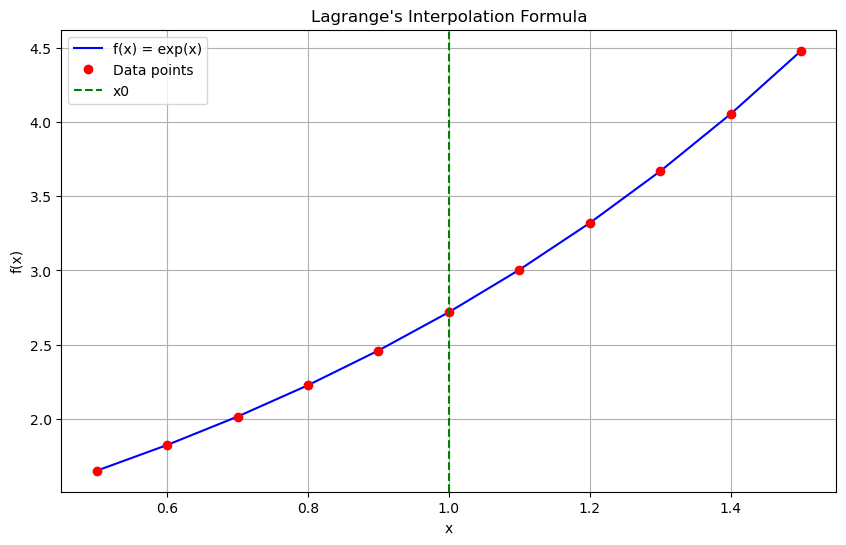

In [5]:
### Lagrange Interpolation Formula
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.exp(x)

# Parameters
x0 = 1  # Point at which we want the derivative
h = 0.1  # Step size
N = 5   # Number of points on either side of x0

# Generate data points around x0
x = np.arange(x0 - N*h, x0 + (N+1)*h, h)
y = f(x)

# Lagrange basis polynomial
def lagrange_basis(x, xi, i):
    L = 1
    for j in range(len(xi)):
        if j != i:
            L *= (x - xi[j]) / (xi[i] - xi[j])
    return L

# Derivative of Lagrange basis polynomial
def lagrange_basis_derivative(x, xi, i):
    sum = 0
    for j in range(len(xi)):
        if j != i:
            product = 1
            for k in range(len(xi)):
                if k != i and k != j:
                    product *= (x - xi[k]) / (xi[i] - xi[k])
            sum += product / (xi[i] - xi[j])
    return sum

# Compute the derivative at x0 using Lagrange's interpolation formula
def lagrange_derivative(x, y, x0):
    n = len(x)
    derivative = 0
    for i in range(n):
        derivative += y[i] * lagrange_basis_derivative(x0, x, i)
    return derivative

# Compute the approximate derivative at x0
f_prime_approx = lagrange_derivative(x, y, x0)

print("Approximate first derivative at x0 =", x0, "is:", f_prime_approx)

# Plot the function and the points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = exp(x)')
plt.plot(x, y, 'ro', label='Data points')
plt.axvline(x=x0, color='g', linestyle='--', label='x0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Lagrange\'s Interpolation Formula')
plt.legend()
plt.grid(True)
plt.show()

Approximate first derivative at x0 = 1 is: 2.1391211155178342


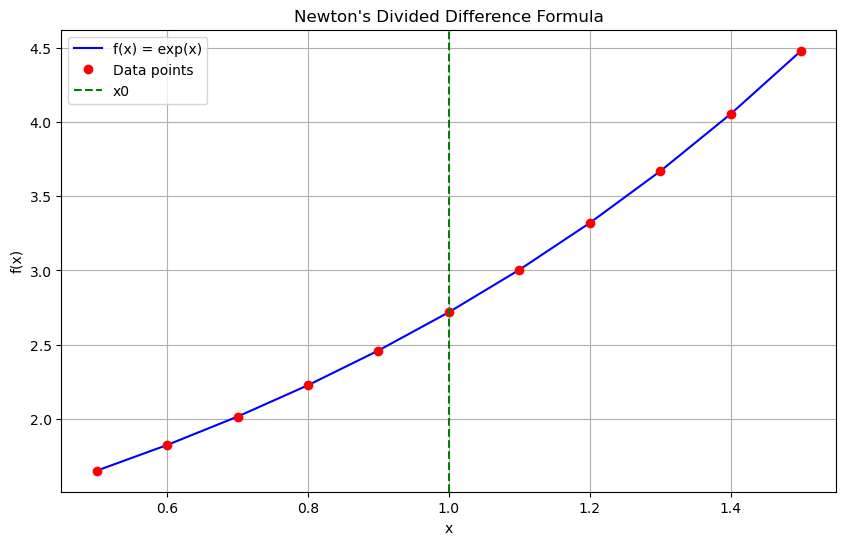

In [6]:
### Newton's Divided Difference Formula

import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.exp(x)

# Parameters
x0 = 1  # Point at which we want the derivative
h = 0.1  # Step size
N = 5   # Number of points on either side of x0

# Generate data points around x0
x = np.arange(x0 - N*h, x0 + (N+1)*h, h)
y = f(x)

# Compute divided differences
def divided_differences(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    return coef

# Compute the divided difference table
coef = divided_differences(x, y)

# Compute the derivative using the first divided differences
f_prime_approx = coef[0, 1]

for i in range(2, len(coef)):
    term = coef[0, i]
    for j in range(1, i):
        term *= (x0 - x[j])
    f_prime_approx += term

print("Approximate first derivative at x0 =", x0, "is:", f_prime_approx)

# Plot the function and the points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = exp(x)')
plt.plot(x, y, 'ro', label='Data points')
plt.axvline(x=x0, color='g', linestyle='--', label='x0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Divided Difference Formula')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Maxima aimport numpy as np
import numpy as np
from scipy.interpolate import newton
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - 3*x**2 + x + 6

# Generate data points
x_data = np.linspace(-1, 3, 10)
y_data = f(x_data)

# Interpolate data using Newton's interpolation
interpolated_polynomial = newton(x_data, y_data)

# Compute the derivative of the interpolating polynomial
derivative_coefficients = np.polyder(interpolated_polynomial)

# Find roots of the derivative polynomial
potential_extrema = np.roots(derivative_coefficients)

# Evaluate the second derivative at potential extrema
second_derivative = np.polyder(derivative_coefficients)
for x in potential_extrema:
    second_deriv_value = np.polyval(second_derivative, x)
    if second_deriv_value > 0:
        print(f"Local minimum at x = {x}, value = {np.polyval(interpolated_polynomial, x)}")
    elif second_deriv_value < 0:
        print(f"Local maximum at x = {x}, value = {np.polyval(interpolated_polynomial, x)}")
    else:
        print(f"Inconclusive at x = {x}, value = {np.polyval(interpolated_polynomial, x)}")

# Plot the function and interpolated polynomial
x_plot = np.linspace(-1, 3, 100)
y_plot = f(x_plot)
interpolated_y = np.polyval(interpolated_polynomial, x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Original Function')
plt.plot(x_plot, interpolated_y, label='Interpolated Polynomial', linestyle='--')
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Interpolation and Extrema Estimation')
plt.legend()
plt.grid(True)
plt.show()
# it needs scipy 0.4.x


ImportError: cannot import name 'newton' from 'scipy.interpolate' (/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/scipy/interpolate/__init__.py)

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Local minimum at x = -1.0, value = 1.0
Local minimum at x = -0.9968157573081294, value = 1.0317816227958965
Local maximum at x = 1.6410456072550903, value = 3.981339727953531
Local maximum at x = 1.8563752619862275, value = 3.9152967576103737
Local maximum at x = 1.8287120474106, value = 3.9117052218922646
Local maximum at x = 1.8048049264112105, value = 3.9116711263827266
Local minimum at x = -0.9999431476572727, value = 1.000568504034324
Local maximum at x = 1.7702816850932246, value = 3.9164708464016185
Local maximum at x = 1.7792590183620012, value = 3.914682807969346
Local maximum at x = 2.039803970345043, value = 4.044620102172166


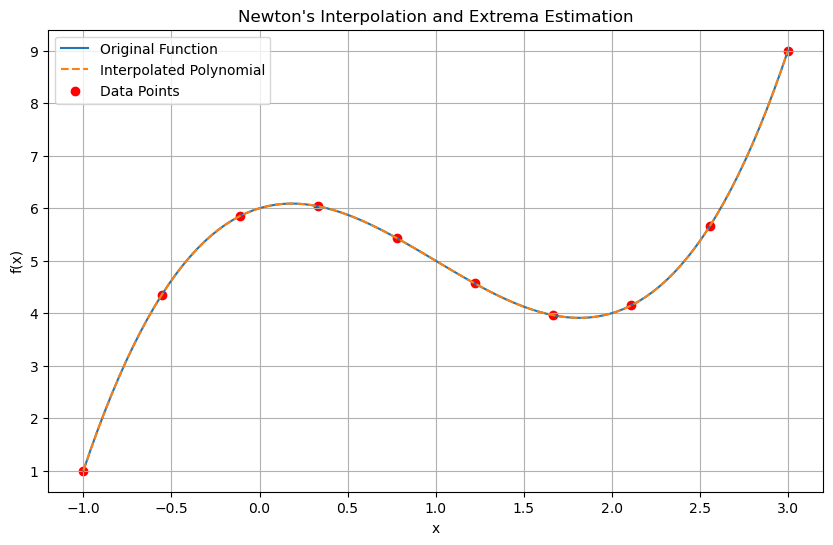

In [9]:
#Maxima aimport numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - 3*x**2 + x + 6

# Generate data points
x_data = np.linspace(-1, 3, 10)
y_data = f(x_data)

# Compute Newton's divided differences
def divided_differences(x_data, y_data):
    n = len(x_data)
    coef = np.zeros([n, n])
    coef[:,0] = y_data
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x_data[i + j] - x_data[i])
    return coef[0, :]

# Compute the Newton interpolating polynomial coefficients
coefficients = divided_differences(x_data, y_data)

# Function to evaluate the Newton polynomial at a given point x
def newton_polynomial(x, x_data, coefficients):
    n = len(coefficients)
    result = coefficients[-1]
    for i in range(n-2, -1, -1):
        result = result * (x - x_data[i]) + coefficients[i]
    return result

# Function to compute the first derivative of the Newton polynomial
def newton_polynomial_derivative(x, x_data, coefficients):
    n = len(coefficients)
    derivative = 0
    for i in range(1, n):
        term = coefficients[i]
        for j in range(i):
            term *= (x - x_data[j])
        derivative += term
    return derivative

# Function to compute the second derivative of the Newton polynomial
def newton_polynomial_second_derivative(x, x_data, coefficients):
    n = len(coefficients)
    second_derivative = 0
    for i in range(2, n):
        term = coefficients[i]
        for j in range(i):
            for k in range(j+1, i):
                term *= (x - x_data[k])
        second_derivative += term
    return second_derivative

# Find potential extrema by solving the first derivative polynomial
from scipy.optimize import fsolve

potential_extrema = fsolve(lambda x: newton_polynomial_derivative(x, x_data, coefficients), x_data)

# Evaluate the second derivative at potential extrema
for x in potential_extrema:
    second_deriv_value = newton_polynomial_second_derivative(x, x_data, coefficients)
    if second_deriv_value > 0:
        print(f"Local minimum at x = {x}, value = {newton_polynomial(x, x_data, coefficients)}")
    elif second_deriv_value < 0:
        print(f"Local maximum at x = {x}, value = {newton_polynomial(x, x_data, coefficients)}")
    else:
        print(f"Inconclusive at x = {x}, value = {newton_polynomial(x, x_data, coefficients)}")

# Plot the function and interpolated polynomial
x_plot = np.linspace(-1, 3, 100)
y_plot = f(x_plot)
interpolated_y = [newton_polynomial(x, x_data, coefficients) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Original Function')
plt.plot(x_plot, interpolated_y, label='Interpolated Polynomial', linestyle='--')
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Interpolation and Extrema Estimation')
plt.legend()
plt.grid(True)
plt.show()
